# RESOLUCOES DOS LABORATORIOS

In [7]:
# Importado as bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# MOD01
# LAB01

# Sistemas de recomendação,
# Gerenciamento de riscos financeiros,
# Melhoria em serviços de saúde,
# Reconhecimento de imagens,
# Gerenciamento eficiente de energia:

# LAB02

# NumPy é o pacote fundamental para computação científica em Python. 
# É uma biblioteca Python que fornece um objeto array multidimensional, 
# vários objetos derivados (como arrays e matrizes mascarados) e uma 
# variedade de rotinas para operações rápidas em arrays, incluindo matemática, 
# lógica, manipulação de formas, classificação, seleção, E/S, 
# transformadas discretas de Fourier, álgebra linear básica, 
# operações estatísticas básicas, simulação aleatória e muito mais.

1.25

In [40]:
# MOD 02
# LAB 01

#dataset => 562 linhas e 21 colunas
# colunas
# 'CODCLI', 'NOME', 'FANTASIA', 'ENDERECO', 'BAIRRO', 
# 'CIDADE', 'ESTADO', 'CEP', 'END_COB', 'BAI_COB', 
# 'CID_COB', 'EST_COB', 'CEP_COB', 'CNPJ',
# 'INSCRICAO', 'FONE1', 'FAX', 'E_MAIL', 'DATA_CAD', 'ICMS',
# 'REVENDA_CONSUMIDOR'
clientes = pd.read_csv('mod_02/clientes.csv', sep=';')
# print(clientes.head(2))

#dataset => 11322 linhas e 7 colunas 
# 'NUM_PEDIDO', 'CODCLI', 'CODVEN', 'DATA_EMISSAO', 'VLR_TOTAL', 'SITUACAO', 'OBSERVACOES'
pedidos = pd.read_csv('mod_02/pedidos.csv', sep=';')
# pedidos.head(2)

frames = [clientes, pedidos]

# Concaternar (uniao)
df = pd.concat(frames)

# Juncao
df = pd.concat(frames, axis=1, join='inner')

# metodo ja foi utilizado muito
df = clientes.append(pedidos)

merger = pd.merge(clientes[['CODCLI', 'NOME']], pedidos[['CODCLI','VLR_TOTAL']], on='CODCLI')

agrupado = merger.groupby(['CODCLI', 'NOME']).count().reset_index()

df = agrupado.rename(columns={'VLR_TOTAL': 'QTD'}, inplace=True) #inplace=True => serve para fixar a funcao

agrupado.tail()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_1592\3024308271.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = clientes.append(pedidos)


,CODCLI,NOME,QTD
556,622,MULTIACESSO BRINDES E COM VISUAL,15
557,623,MANOEL GOMES FILHO,20
558,624,SILVIO LUIZ RODRIGUES M.E.,21
559,625,IGLESIAS BRINDES,18
560,626,PROGERAL IND. DE ARTEFATOS PLASTICOS LTDA.,23


In [50]:
# MOD 02
# LAB 02

pedidos = pd.read_csv('mod_02/pedidos.csv', sep=';')
i_pedidos = pd.read_csv('mod_02/itenspedido.csv', sep=';')

i_pedidos.head()

merger = pd.merge(pedidos[['NUM_PEDIDO', 'DATA_EMISSAO']], i_pedidos[['NUM_PEDIDO','QUANTIDADE', 'PR_UNITARIO']], on='NUM_PEDIDO')

df = merger.groupby(['NUM_PEDIDO', 'DATA_EMISSAO']).sum().reset_index()

df['TOTAL'] = df['QUANTIDADE'] * df['PR_UNITARIO']

df.head()

,NUM_PEDIDO,DATA_EMISSAO,QUANTIDADE,PR_UNITARIO,TOTAL
0,2,2012-12-18 01:53:13.497,90,1.12,100.80
1,3,2012-12-18 01:53:13.497,70,2.60,182.00
2,4,2012-12-18 01:53:13.497,500,3.81,1905.00
3,5,2012-12-18 01:53:13.497,60,2.54,152.40
4,6,2012-12-18 01:53:13.497,1005,15.77,15848.85


In [57]:
import datetime as dt

data = dt.date.today()
data1 = dt.date(2021,9,24)
print(data1)
print(data1.day)
print(data1.month)
print(data1.year)


2021-09-24
24
9
2021


In [63]:
# formatos
ts = pd.Timestamp('2021-08-30')
ts1 = pd.Timestamp('29/11/2001')
ts2 = pd.Timestamp('05/28/2001')
ts

C:\Users\Administrator\AppData\Local\Temp\ipykernel_1592\248192870.py:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  ts1 = pd.Timestamp('29/11/2001')


Timestamp('2021-08-30 00:00:00')

In [77]:
index = pd.DatetimeIndex(['2021-08-30','29/11/2022','05/28/2023','05/28/2024'])

data = pd.Series([0,10,20,30], index=index)

data.head()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_1592\1860074240.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  index = pd.DatetimeIndex(['2021-08-30','29/11/2022','05/28/2023','05/28/2024'])


2021-08-30     0
2022-11-29    10
2023-05-28    20
2024-05-28    30
dtype: int64

In [79]:
d1 = data['2021':'2023']
d1

2021-08-30     0
2022-11-29    10
2023-05-28    20
dtype: int64

In [83]:
s = pd.Series(['Jan 15, 2022','29/11/2022','05/28/2023','05/28/2024'])

conv_date = pd.to_datetime(s)

conv_date.head()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_1592\1476682593.py:3: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  conv_date = pd.to_datetime(s)


0   2022-01-15
1   2022-11-29
2   2023-05-28
3   2024-05-28
dtype: datetime64[ns]

In [97]:
# obter data
ts = pd.Timestamp('15/01/2020')

# adicionando mais dias (25/01/2020)
ts1 = ts + pd.Timedelta(days = 10)

# adicionando horas e minutos
ts2 = ts + pd.Timedelta(hours=5, minutes=30)

# fazendo uma operacao dentra do mes
delta = ts1 - ts

# pegando os dias do deltatime
dias = delta.days

print(f'ts: {ts}')
print(f'ts1: {ts1}')
print(f'ts2: {ts2}')
print(f'delta: {delta}')
print(f'dias: {dias}')


ts: 2020-01-15 00:00:00
ts1: 2020-01-25 00:00:00
ts2: 2020-01-15 05:30:00
delta: 10 days 00:00:00
dias: 10


C:\Users\Administrator\AppData\Local\Temp\ipykernel_1592\2997907298.py:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  ts = pd.Timestamp('15/01/2020')


In [100]:
# MOD 03
# LAB 01
data1 = input('Informe a PRIMEIRA data: ')
data2 = input('Informe a SEGUNDA data: ')

dias = int(input('Agora informe o numero de dias: '))

ts1 = pd.Timestamp(data1)
ts2 = pd.Timestamp(data2)

if ts1 > ts2:
    difer = ts1 - ts2
else:
    difer = ts2 - ts1

ts3 = ts2 + pd.Timedelta(days= dias)

print(f'Data 01: {ts1}, Data 02: {ts2}, Diferencia: {difer}, Dias: {dias}, Dias adicionado: {ts3}')

Data 01: 2000-01-15 00:00:00, Data 02: 2010-01-15 00:00:00, Diferencia: 3653 days 00:00:00, Dias: 31, Dias adicionado: 2010-02-15 00:00:00


C:\Users\Administrator\AppData\Local\Temp\ipykernel_1592\3962032552.py:8: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  ts1 = pd.Timestamp(data1)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_1592\3962032552.py:9: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  ts2 = pd.Timestamp(data2)


In [110]:
# SERIES CATEGORIZADAS
# DATAFRAMES COM VARIAVEIS CATEGORIZADAS
# Sexo: Masculino e Feminino (0,1)
# Periodos(periodos escolares): manha, tarde e noite
# Regioes de uma: leste, oeste, norte e sul

# Servir para agrupar elementes, caracteristicas
# Nao podem sofrer alteracoes temporais

s = pd.Series(['a', 'b', 'c', 'a'], dtype='category' )
print(s,'\n')

c = pd.Categorical(['a', 'b', 'c', 'a', 'b', 'c', 'c'])
print(c,'\n')

c1 = pd.Categorical(['a', 'b', 'c', 'a', 'b', 'c', 'c'], ordered=True)
print(c1)


0    a
1    b
2    c
3    a
dtype: category
Categories (3, object): ['a', 'b', 'c'] 

['a', 'b', 'c', 'a', 'b', 'c', 'c']
Categories (3, object): ['a', 'b', 'c'] 

['a', 'b', 'c', 'a', 'b', 'c', 'c']
Categories (3, object): ['a' < 'b' < 'c']


In [120]:
s1 = s.describe()
print(s1,'\n')

c2 = c.describe()
c2.freqs *= 100 # c2.freqs = c2.freqs * 100
print(c2,'\n')



count     4
unique    3
top       a
freq      2
dtype: object 

            counts      freqs
categories                   
a                2  28.571429
b                2  28.571429
c                3  42.857143 



In [130]:
c = pd.Categorical(['a', 'b', 'c', 'a', 'b', 'c', 'c'], ordered=True)
print(c,'\n')

# adicionar
c2 = c.add_categories(['x'])
print(c2,'\n')


# remover
c1 = c.remove_categories(['b'])
c1



['a', 'b', 'c', 'a', 'b', 'c', 'c']
Categories (3, object): ['a' < 'b' < 'c'] 

['a', 'b', 'c', 'a', 'b', 'c', 'c']
Categories (4, object): ['a' < 'b' < 'c' < 'x'] 



['a', NaN, 'c', 'a', NaN, 'c', 'c']
Categories (2, object): ['a' < 'c']

In [134]:
df = pd.read_csv('data2.csv')

df.shape
df.head(2)

,Name,Week,Duration,Pulse,Maxpulse,Calories
0,Robert,1,60,110,130,409.1
1,Mark,1,60,117,145,479.0


In [141]:
print(df.Name.head(),'\n')
# converte nome para uma variavel categorica
df1 = df.astype({'Name': 'category'})
print(df1.Name.head())

0    Robert
1      Mark
2     Susan
3     Peter
4     Dante
Name: Name, dtype: object 

0    Robert
1      Mark
2     Susan
3     Peter
4     Dante
Name: Name, dtype: category
Categories (14, object): ['Charles', 'Clark', 'Dante', 'James', ..., 'Peter', 'Robert', 'Samantha', 'Susan']


In [145]:
# categoria em DATAFRAMES

df = pd.DataFrame({
    'Python': ['Lucas', 'Ana', 'Paulo'],
    'Java': ['Jefesson', 'Julio', 'Bernardo']
}, dtype='category')

print(df.head(),'\n')
print(df.dtypes)

  Python      Java
0  Lucas  Jefesson
1    Ana     Julio
2  Paulo  Bernardo 

Python    category
Java      category
dtype: object


In [207]:
df = pd.DataFrame({
    'Bimestre1':[np.random.randint(10) for _ in range(100)],
    'Bimestre2':[np.random.randint(10) for _ in range(100)]
}, dtype='category')

grp1 = df.groupby(['Bimestre1']).count().reset_index()
grp2 = df.groupby(['Bimestre2']).count().reset_index()
print(grp1.head(2),'\n')
print(grp2.head(2),'\n')

  Bimestre1  Bimestre2
0         0         15
1         1         13 

  Bimestre2  Bimestre1
0         0          8
1         1         11 



In [208]:
# Frequencia
freq_b1 = df['Bimestre1'].value_counts()

# percentual
perc_b1 = df.Bimestre1.value_counts(normalize=True) * 100

dist_freq_perc_b1 = pd.DataFrame({'Frequencia': freq_b1, 'Porcentagem %': perc_b1}).reset_index()

dist_freq_perc_b1.head(1)

,index,Frequencia,Porcentagem %
0,0,15,15.0


In [209]:
# Frequencia
freq_b2 = df['Bimestre2'].value_counts()

# percentual
perc_b2 = df.Bimestre2.value_counts(normalize=True) * 100

dist_freq_perc_b2 = pd.DataFrame({'Frequencia': freq_b2, 'Porcentagem %': perc_b2}).reset_index()

dist_freq_perc_b2.head(1)

,index,Frequencia,Porcentagem %
0,5,14,14.0


(array([3., 1., 1., 1., 0., 1., 0., 2., 0., 1.]),
 array([ 7. ,  7.8,  8.6,  9.4, 10.2, 11. , 11.8, 12.6, 13.4, 14.2, 15. ]),
 <BarContainer object of 10 artists>)

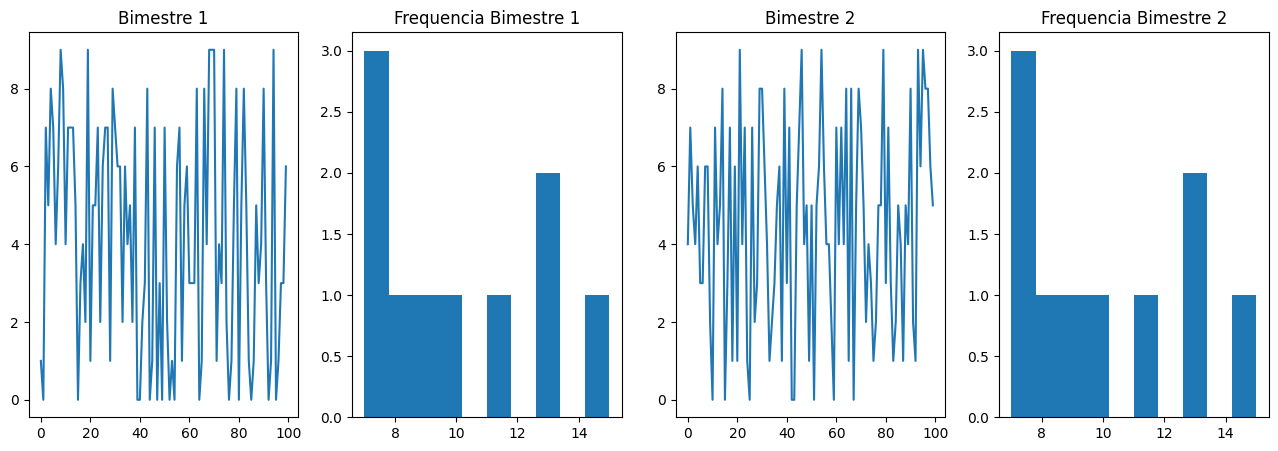

In [217]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1,4, figsize=(16,5))

ax1.set_title('Bimestre 1')
ax1.plot(df.Bimestre1)

ax2.set_title('Frequencia Bimestre 1')
ax2.hist(dist_freq_perc_b1.Frequencia)

ax3.set_title('Bimestre 2')
ax3.plot(df.Bimestre2)

ax4.set_title('Frequencia Bimestre 2')
ax4.hist(dist_freq_perc_b1.Frequencia)

In [220]:
# MOD 04
# LAB 01

clientes = pd.read_csv('mod_02/clientes.csv', sep=';')
pedidos = pd.read_csv('mod_02/pedidos.csv', sep=';')

df = pd.merge(
    clientes[['CODCLI', 'NOME','CIDADE']], 
    pedidos[['CODCLI', 'VLR_TOTAL']], 
    on='CODCLI').groupby(['CODCLI','NOME']).count().reset_index().rename(columns={'VLR_TOTAL': 'QTD'})

df.head()
df.describe()



,CODCLI,CIDADE,QTD
count,561.000000,561.000000,561.000000
mean,304.106952,19.385027,20.147950
std,176.610475,7.448014,6.496801
min,3.000000,0.000000,5.000000
25%,151.000000,16.000000,16.000000
50%,301.000000,19.000000,20.000000
75%,450.000000,23.000000,23.000000
max,626.000000,83.000000,83.000000


   CODCLI                                          NOME  CIDADE  QTD
0       3                        AUGUSTO FOLHINHAS LTDA      16   16
3       6                            ANTONIO M.DE SOUZA      16   16
4       7  ERISTON SERIGRAFIA ESTRUT.ART.PLAST.LTDA.-ME      19   19
6      11                               ANDRE DE CASTRO      18   18
7      12          ANDRADE E SILVA BRINDES PROMOCIONAIS      19   19


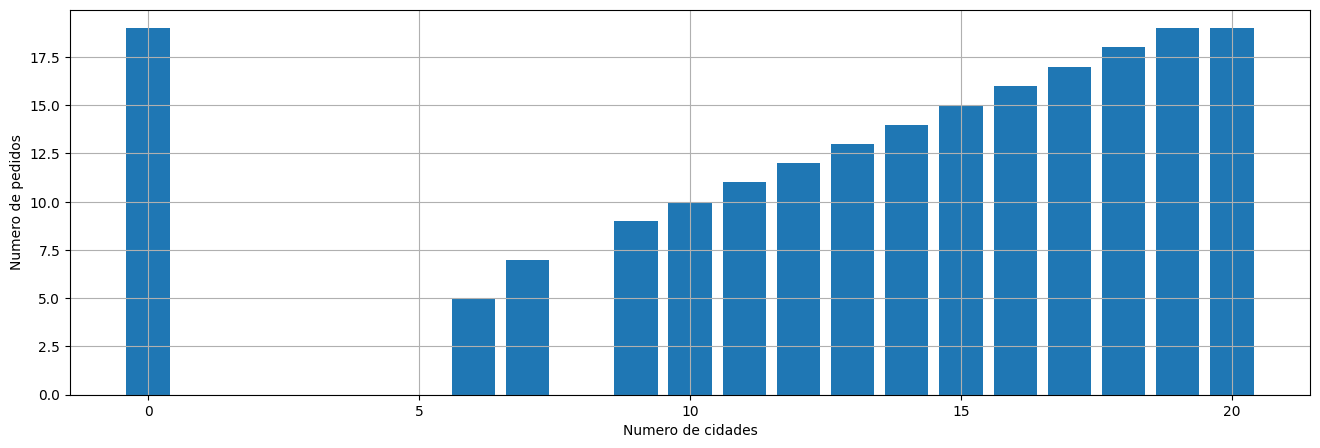

In [224]:
df_filtro = df['QTD'] < 20
df = df[df_filtro]

print(df.head())

fig = plt.figure(figsize=(16,5))

plt.bar(df.CIDADE, df.QTD)

plt.xlabel('Numero de cidades')
plt.ylabel('Numero de pedidos')

plt.grid(visible=True)
